In [60]:
import numpy as np
import h5py
import petl as etl
import sys
sys.path.insert(0, '../..')
import allel; print('allel', allel.__version__)
%reload_ext autoreload
%autoreload 1
%aimport allel.stats.sf

allel 0.20.3


In [2]:
callset = h5py.File('/data/coluzzi/ag1000g/data/phase1/release/AR3/variation/main/hdf5/ag1000g.phase1.ar3.pass.h5',
                    mode='r')
callset

<HDF5 file "ag1000g.phase1.ar3.pass.h5" (mode r)>

In [4]:
tbl_samples = (
    etl
    .fromtsv('/data/coluzzi/ag1000g/data/phase1/release/AR3/samples/samples.meta.txt')
    .convert('index', int)
)
tbl_samples

index,ox_code,src_code,sra_sample_accession,population,country,region,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,latitude,longitude
0,AB0085-C,BF2-4,ERS223996,BFS,Burkina Faso,Pala,Austin Burt,Sam O'Loughlin,2012,S,F,89905852,28.01,11.15,-4.235
1,AB0087-C,BF3-3,ERS224013,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,116706234,36.76,11.233,-4.472
2,AB0088-C,BF3-5,ERS223991,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,112090460,23.3,11.233,-4.472
3,AB0089-C,BF3-8,ERS224031,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,145350454,41.36,11.233,-4.472
4,AB0090-C,BF3-10,ERS223936,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,105012254,34.64,11.233,-4.472


In [5]:
pop1 = 'BFM'
pop2 = 'AOM'
pop1_idx = tbl_samples.eq('population', pop1).values('index').list()
pop2_idx = tbl_samples.eq('population', pop2).values('index').list()

In [6]:
chrom = '3R'

In [7]:
genotypes = allel.GenotypeChunkedArray(callset[chrom]['calldata/genotype'])
genotypes

,0,1,2,3,4,...,760,761,762,763,764
0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
1,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
2,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
3,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
4,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0


In [8]:
acs = genotypes.count_alleles_subpops({pop1: pop1_idx, pop2: pop2_idx})
acs

BFM,AOM
[138 0 0 0],[120 0 0 0]
[138 0 0 0],[120 0 0 0]
[138 0 0 0],[120 0 0 0]
[138 0 0 0],[120 0 0 0]
[138 0 0 0],[120 0 0 0]


In [9]:
ac1 = acs[pop1][:]
ac2 = acs[pop2][:]

In [25]:
ac1

,0,1,2,3
0,138,0,0,0
1,138,0,0,0
2,138,0,0,0
3,138,0,0,0
4,138,0,0,0


In [45]:
ac = allel.AlleleCountsArray(ac1 + ac2)
ac

,0,1,2,3
0,258,0,0,0
1,258,0,0,0
2,258,0,0,0
3,258,0,0,0
4,258,0,0,0


In [46]:
loc_bi = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 0)
ac1_bi = ac1.compress(loc_bi, axis=0)[:, :2]
ac2_bi = ac2.compress(loc_bi, axis=0)[:, :2]


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

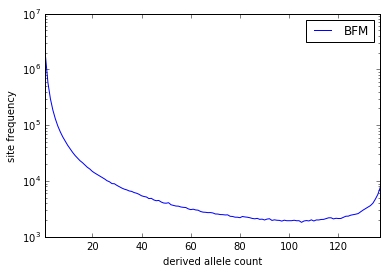

In [48]:
s1 = allel.stats.sfs(ac1_bi[:, 1])
allel.stats.plot_sfs(s1, label=pop1)
plt.legend();

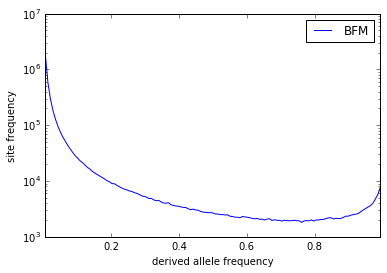

In [49]:
allel.stats.plot_sfs(s1, n=len(pop1_idx)*2, label=pop1)
plt.legend();

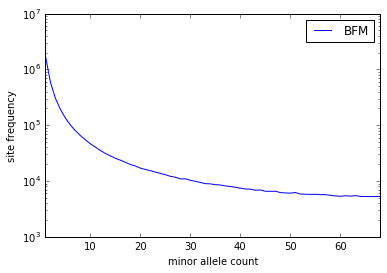

In [50]:
sf1 = allel.stats.sfs_folded(ac1_bi)
allel.stats.plot_sfs_folded(sf1, label=pop1)
plt.legend();

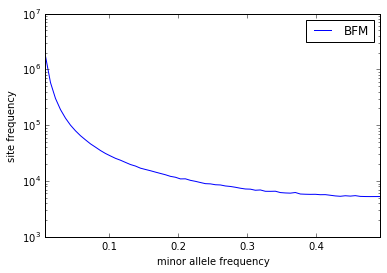

In [51]:
allel.stats.plot_sfs_folded(sf1, label=pop1, n=len(pop1_idx)*2)
plt.legend();

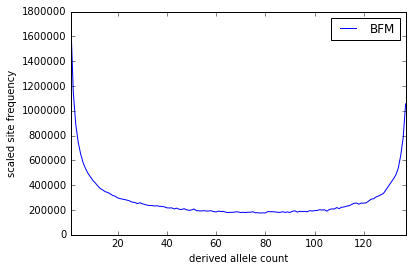

In [52]:
ss1 = allel.stats.sfs_scaled(ac1_bi[:, 1])
allel.stats.plot_sfs_scaled(ss1, label=pop1)
plt.legend();

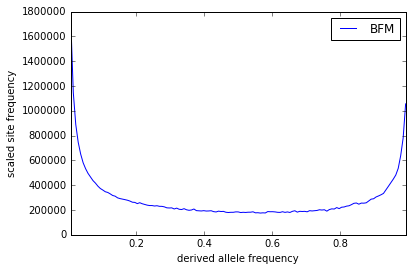

In [53]:
allel.stats.plot_sfs_scaled(ss1, label=pop1, n=len(pop1_idx)*2)
plt.legend();

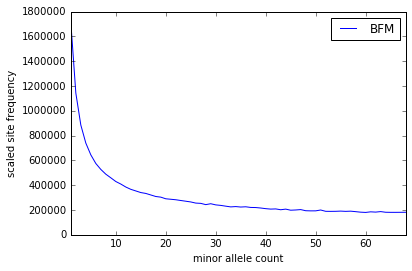

In [54]:
sfs1 = allel.stats.sfs_folded_scaled(ac1_bi)
allel.stats.plot_sfs_folded_scaled(sfs1, label=pop1)
plt.legend();

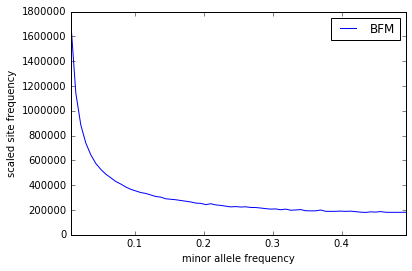

In [55]:
allel.stats.plot_sfs_folded_scaled(sfs1, label=pop1, n=len(pop1_idx)*2)
plt.legend();

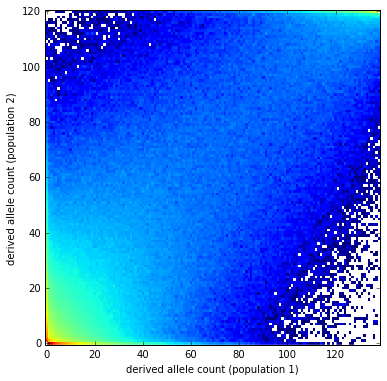

In [66]:
js = allel.stats.joint_sfs(ac1_bi[:, 1], ac2_bi[:, 1])
allel.stats.plot_joint_sfs(js);

In [64]:
len(pop1_idx), len(pop2_idx)

(69, 60)

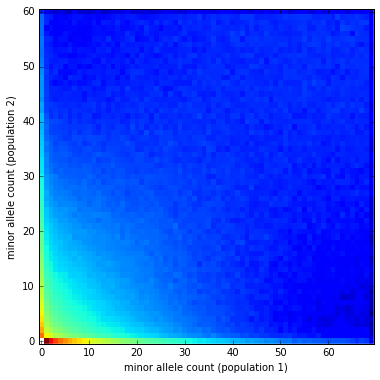

In [67]:
jsf = allel.stats.joint_sfs_folded(ac1_bi, ac2_bi)
allel.stats.plot_joint_sfs_folded(jsf);

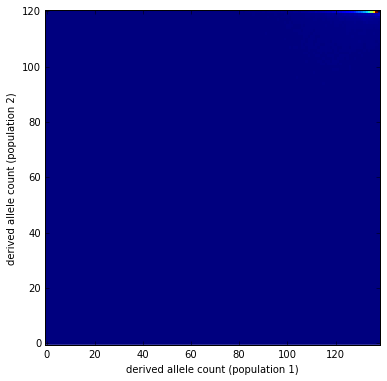

In [69]:
jss = allel.stats.joint_sfs_scaled(ac1_bi[:, 1], ac2_bi[:, 1])
allel.stats.plot_joint_sfs_scaled(jss);

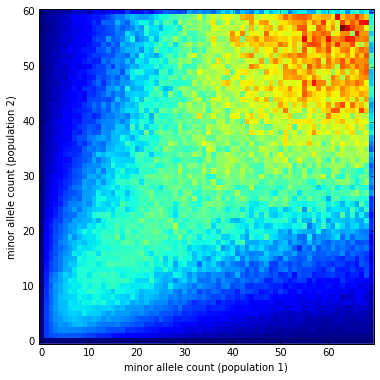

In [70]:
jsfs = allel.stats.joint_sfs_folded_scaled(ac1_bi, ac2_bi)
allel.stats.plot_joint_sfs_folded_scaled(jsfs);